### Demonstrating Bias-Variance tradeoff

Steps:
1. Generate dataset (sigmoid + noise)
2. Fit via linear model & decision tree
3. plot many iterations of the fit
4. Calculate bias and variance of the fit & relation with MSE

In [55]:
%matplotlib inline

import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### 1. Generate the dataset

In [121]:
def generate_dataset():
    X = np.random.uniform(low=-1, high=1, size=50)
    Y_real = 4 * 1 / (1 + np.exp(-X))
    Y = Y_real + np.random.normal(size=X.shape[0])
    X = X[:,np.newaxis]
    return X, Y, Y_real

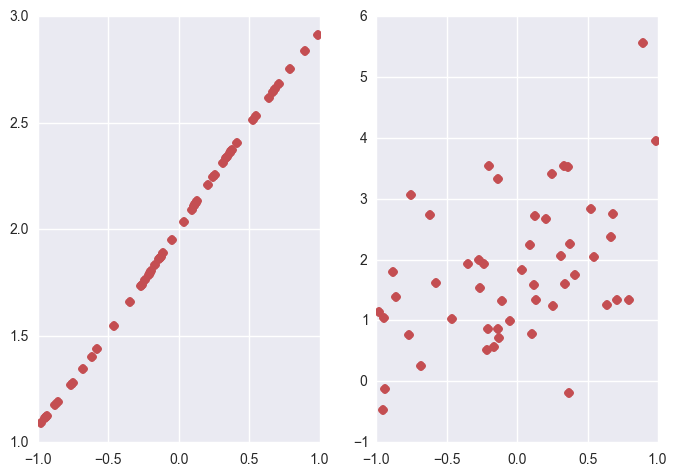

In [122]:
# testing the generate function
X, Y, Y_real = generate_dataset()
plt.subplot(121)
plt.plot(X, Y_real, 'ro')
plt.subplot(122)
plt.plot(X, Y, 'ro')

### 2. Fit via Linear model & Decision Tree

In [126]:
def fitLinearModel(X, Y):
    clf = LinearRegression()
    clf.fit(X, Y)
    return clf

def fitDecisionTree(X, Y):
    clf = DecisionTreeRegressor(max_depth=4)
    clf.fit(X, Y)
    return clf
    
def fitPolynomial(X, Y):
    poly = PolynomialFeatures(degree=5, include_bias=False)
    lr = LinearRegression(fit_intercept=True)
    pipeline = Pipeline([("polynomial_features", poly), ("linear_regression", lr)])
    pipeline.fit(X, Y)
    return poly, pipeline

def predictPolynomial(poly, clf, X):
    poly.transform(X)
    return clf.predict(X)

In [127]:
# testing step 2
fitLinearModel(X, Y)
fitDecisionTree(X, Y)
poly, clf = fitPolynomial(X, Y)
output = predictPolynomial(poly, clf, X)

### 3. Plot Many Iteration of the Fit

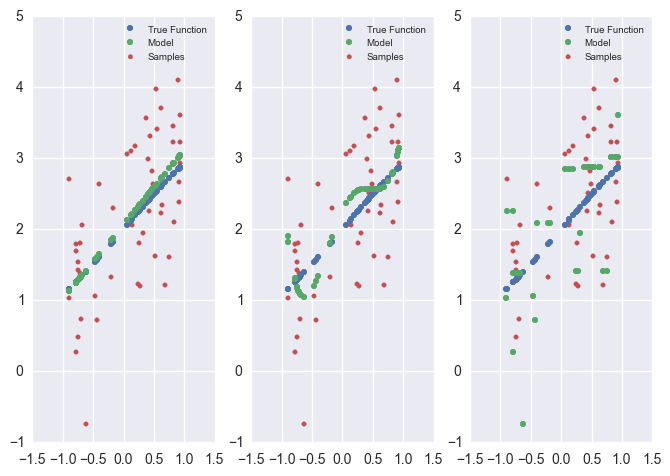

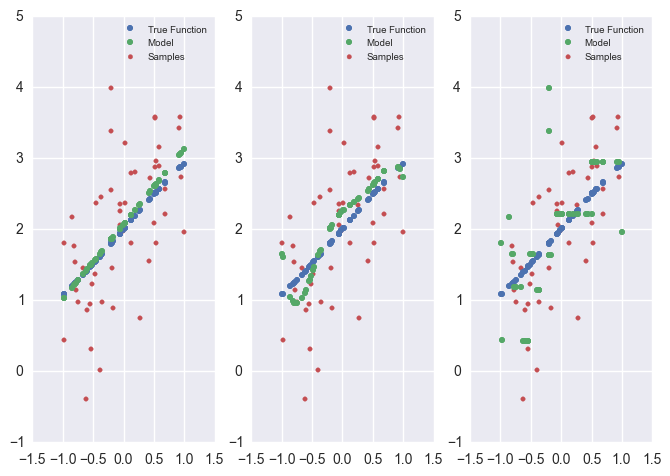

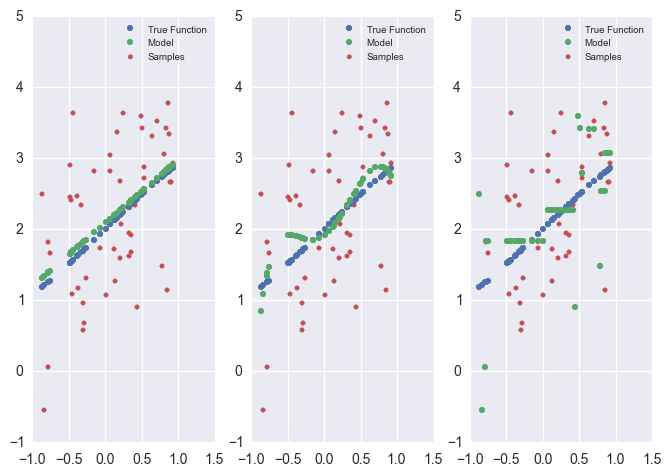

In [128]:
iterations = 3

def plot(X, Y, Y_real, Y_pred):
    plt.scatter(X, Y, color='r', s=10, label = 'Samples')
    plt.plot(X, Y_real, 'bo', markersize=5, label = 'True Function')
    plt.plot(X, Y_pred, 'go', markersize=5, label = 'Model')
    plt.legend(loc='best', fontsize='x-small')

for i in range(iterations):
    X, Y, Y_real = generate_dataset()
    linearClf = fitLinearModel(X, Y)
    treeClf = fitDecisionTree(X, Y)
    poly, polyClf = fitPolynomial(X, Y)
    y_pred_linear = linearClf.predict(X)
    y_pred_poly = predictPolynomial(poly, polyClf, X)
    y_pred_tree = treeClf.predict(X)
    plt.figure(i)
    plt.subplot(100 + iterations * 10 + 1)
    plot(X, Y, Y_real, y_pred_linear)
    plt.subplot(100 + iterations * 10 + 2)
    plot(X, Y, Y_real, y_pred_poly)
    plt.subplot(100 + iterations * 10 + 3)
    plot(X, Y, Y_real, y_pred_tree)